In [11]:
import numpy as np
import matplotlib.pyplot as plt

Jac_type = {1:'Sacado ', 0:'Analytic ', 2:'Numerical '}
format_line={'names': ('computation type', 'total time', 'time per sample'), 'formats': ('S30', 'f16', 'f16')}

In [12]:
vector= [16, 16, 16, 32, 32, 32, 32 ]
team=[2, 4, 8, 1, 2, 4, 8 ]
sacado_team_vector = {0:'2x16', 1:'4x16', 2:'8x16', 3:'1x32', 4:'2x32', 5:'4x32', 6:'8x32'} # team size x vector size 


output_times_2="kokkos-dev-2/DeviceJacSacado"
Nsp= [1,10,50,100,500,1000,5000,10000,50000,100000,200000,300000]#
data = np.zeros([len(Nsp), len(team)])

for m,N in enumerate(Nsp):
    for i in range(5):
        last_name = "/Times_nBacth"+str(N)+"_V"+str(vector[i])+"T"+str(team[i])+".dat"
        output_2=output_times_2 + last_name
        temp_data2 = np.genfromtxt(output_2, dtype=format_line, delimiter=",",comments="#")
        try:
            data[m,i] = temp_data2[1][2]
        except : 
            print('File is empty')
            data[m,i] = np.nan
        else:
            data[m,i] = temp_data2[1][2]
            

In [21]:

vector= [32,32,32,32]
team=[1,2,4,8]
analytic_team_vector = {0:'1x32', 1:'2x32', 2:'4x32', 3:'8x32'} # team size x vector size 

data2 = np.zeros([len(Nsp), len(team)])
output_times_1="kokkos-dev-2/DeviceJacAnalytic"

for m,N in enumerate(Nsp):
    for i in range(4):
        last_name = "/Times_nBacth"+str(N)+"_V"+str(vector[i])+"T"+str(team[i])+".dat"
        output_2=output_times_1 + last_name
        temp_data2 = np.genfromtxt(output_2, dtype=format_line, delimiter=",",comments="#")
        try:
            data2[m,i] = temp_data2[1][2]
        except : 
            print('File is empty')
            data2[m,i] = np.nan
        else:
            data2[m,i] = temp_data2[1][2]    

In [24]:
vector= [32,32,32,32]
team=[1,2,4,8]
numerical_team_vector = {0:'1x32', 1:'2x32', 2:'4x32', 3:'8x32'} # team size x vector size

data3 = np.zeros([len(Nsp), len(team)])
output_times_1="kokkos-dev-2/DeviceJacNumFwd"
for m,N in enumerate(Nsp):
    for i in range(4):
        last_name = "/Times_nBacth"+str(N)+"_V"+str(vector[i])+"T"+str(team[i])+".dat"
        output_2=output_times_1 + last_name
        temp_data2 = np.genfromtxt(output_2, dtype=format_line, delimiter=",",comments="#")
        try:
            data3[m,i] = temp_data2[1][2]
        except : 
            print('File is empty')
            data3[m,i] = np.nan
        else:
            data3[m,i] = temp_data2[1][2]

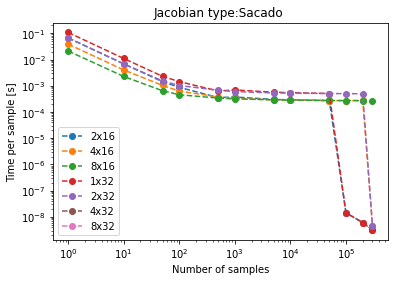

In [25]:
inx_Jac_type = 1
plt.figure()
plt.title('Jacobian type:'+ Jac_type[inx_Jac_type])
for i in range(7):
    plt.plot(Nsp,data[:,i],'o--',label=  sacado_team_vector[i])
plt.yscale('log')
plt.xscale('log')
plt.ylabel('Time per sample [s]')
plt.xlabel('Number of samples')
plt.legend(loc='best')

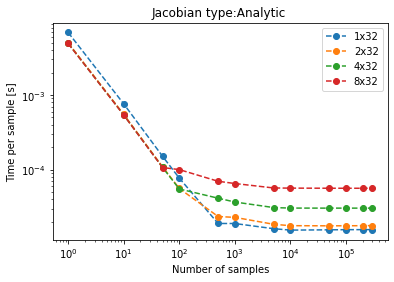

In [28]:
inx_Jac_type = 0
plt.figure()
plt.title('Jacobian type:'+ Jac_type[inx_Jac_type])
for i in range(4):
    plt.plot(Nsp,data2[:,i],'o--',label=  analytic_team_vector[i])
plt.yscale('log')
plt.xscale('log')
plt.ylabel('Time per sample [s]')
plt.xlabel('Number of samples')
plt.legend(loc='best')

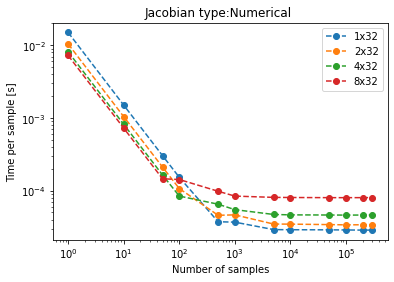

In [29]:
inx_Jac_type = 2
plt.figure()
plt.title('Jacobian type:'+ Jac_type[inx_Jac_type])
for i in range(4):
    plt.plot(Nsp,data3[:,i],'o--',label=numerical_team_vector[i])
plt.yscale('log')
plt.xscale('log')
plt.ylabel('Time per sample [s]')
plt.xlabel('Number of samples')
plt.legend(loc='best')